In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

In [87]:
zomato_df = pd.read_csv("zomato.csv")

In [88]:
zomato_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [89]:
zomato_df.shape

(51717, 17)

In [90]:
zomato_df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

# Data Cleaning

In [91]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [92]:
# Removing unnesessary columns.

zomato_df.drop(columns=['url', 'address', 'phone', 'menu_item', 'reviews_list', 'dish_liked'], axis=1, inplace=True)
# OR zomato_df = zomato_df.drop(['url', 'address', 'phone', 'menu_item', 'reviews_list', 'dish_liked'], axis=1)

In [93]:
zomato_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [94]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [95]:
# Removing duplicates from the dataset.

zomato_df.drop_duplicates(inplace=True)
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51609 non-null  object
 1   online_order                 51609 non-null  object
 2   book_table                   51609 non-null  object
 3   rate                         43854 non-null  object
 4   votes                        51609 non-null  int64 
 5   location                     51588 non-null  object
 6   rest_type                    51382 non-null  object
 7   cuisines                     51564 non-null  object
 8   approx_cost(for two people)  51265 non-null  object
 9   listed_in(type)              51609 non-null  object
 10  listed_in(city)              51609 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.7+ MB


### Evaluating 'rate' Column

In [96]:
# We want to keep the rating in such a format where we don't want the out of value and slash(/) too.
# Only want the simple float value. like: (4.5, 2.4, 3.4)


# There might be some unique value, Other than rating. We will handle these first.
zomato_df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

#### Removing "NEW", "-" and "/5" from rate column

In [97]:
# defining function which can handle the edge cases
# this handlerate function will handle the edge cases for rate column data

def handlerate(value):
    if(value=="NEW" or value=="-"):
        return np.nan                        # why nan? because we can easily handle NaN values after elimintating non-require rows
    else:
        value = str(value).split('/')        # After splitting, value_list contains two string @0 our float value and @1 the '/5' value.
        value = value[0]                     # We will save the Float_rating in value which present at 0th index.
        return float(value)                  # Returning the explicit float value either it was 3, afterwards it's 3.00

# applying the float value in 'rate' column by calling the handlerate function.
zomato_df['rate'] = zomato_df['rate'].apply(handlerate)                             # we use .apply() function to call the user_defined function
zomato_df['rate'].info()

<class 'pandas.core.series.Series'>
Index: 51609 entries, 0 to 51716
Series name: rate
Non-Null Count  Dtype  
--------------  -----  
41590 non-null  float64
dtypes: float64(1)
memory usage: 806.4 KB


#### After eliminating the "NEW", "-" and "/" from the rate. Need to fill the NaN values in rate column

In [98]:
zomato_df['rate'].isnull().sum()

10019

In [99]:
zomato_df['rate'].fillna(zomato_df['rate'].mean(), inplace=True)
zomato_df['rate'].isnull().sum()

C:\Users\devsa\AppData\Local\Temp\ipykernel_3004\1900133113.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  zomato_df['rate'].fillna(zomato_df['rate'].mean(), inplace=True)


0

### Handling more null containing columns

In [100]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         51609 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


### Evaluating [location, rest_type, cuisines, approx_cost(for two people)] Columns

In [101]:
# location, rest_type, cuisines, approx_cost(for two people)

zomato_df.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        21
rest_type                      227
cuisines                        45
approx_cost(for two people)    344
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

In [102]:
# there are few null values in huge database. So I simply delete those values

zomato_df.dropna(inplace=True)
zomato_df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [103]:
zomato_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


#### Renaming the columns name for simplicity

In [104]:
# Renaming syntax like {'key1':'value1', 'key2':'value2'}

zomato_df.rename(columns={"approx_cost(for two people)":"Cost2plates", "listed_in(type)":"type", "listed_in(city)":"city"}, inplace=True)
zomato_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


### Evaluating [location, city] Columns

In [105]:
zomato_df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [106]:
zomato_df['city'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

##### As we observed that all listed Restraunts are Banglore based and we have 2 columns with same fundamental info. So, we can work with One column for Restraunts location.

In [107]:
# Dropping the city column

zomato_df.drop(columns=["city"], axis=1, inplace=True)
zomato_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


### Evaluating [Cost2plates] Column 

In [108]:
zomato_df['Cost2plates'].unique()

# The price for Cost2plates contains the comma(,) in the price itself restricted to be an integer.
# It should be an integer or float but should not be a string

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [109]:
def handleCost(value):
    # convert the value into string(value)
    value = str(value)

    # If the compiler finds ',' in the value_string. Then it will be replaced with '', after that convert it into float value.
    if ',' in value:
        value=value.replace(',','')
        return float(value)
    else:
        return float(value)

zomato_df["Cost2plates"] = zomato_df["Cost2plates"].apply(handleCost)
zomato_df["Cost2plates"].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [110]:
zomato_df["Cost2plates"].value_counts()

Cost2plates
300.0     7531
400.0     6503
500.0     4929
200.0     4829
600.0     3687
          ... 
60.0         1
5000.0       1
3700.0       1
469.0        1
160.0        1
Name: count, Length: 70, dtype: int64

### Evaluating [rest_type] Column

In [111]:
zomato_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [112]:
zomato_df['rest_type'].value_counts()

rest_type
Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

In [113]:
# this, rest_types contains key:value_counts in descending order grouped by count format.

rest_types = zomato_df['rest_type'].value_counts(ascending=False)
rest_types

rest_type
Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

In [114]:
# I want those rest_types where count_of_rest_types<1000. So, I can make the cluster named 'others' due to their low frequency of distinct rest_types.

rest_types_lessthan1000 = rest_types[rest_types<1000]
rest_types_lessthan1000

rest_type
Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: count, Length: 85, dtype: int64

In [115]:
# Making rest_types less than 1000 in frequency as others

def handle_rest_type(value):
    if(value in rest_types_lessthan1000):
        return 'others'
    else:
        return value

zomato_df['rest_type'] = zomato_df['rest_type'].apply(handle_rest_type)
zomato_df['rest_type'].value_counts()

rest_type
Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: count, dtype: int64

### Evaluating [location] Column

In [116]:
zomato_df["location"].value_counts(ascending=False)

location
BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64

In [117]:
# making cluster of those locations where frequncy is less than 300

locations = zomato_df['location'].value_counts(ascending=False)
locs_lessthan300 = locations[locations<300]
locs_lessthan300

location
Koramangala 8th Block            294
Vasanth Nagar                    293
Jeevan Bhima Nagar               268
Wilson Garden                    246
Bommanahalli                     236
Koramangala 3rd Block            215
Thippasandra                     191
Kumaraswamy Layout               191
Nagawara                         187
Basaveshwara Nagar               187
Seshadripuram                    165
Hennur                           159
Majestic                         155
HBR Layout                       153
Infantry Road                    150
Race Course Road                 139
City Market                      122
Yeshwantpur                      119
ITPL Main Road, Whitefield       113
Varthur Main Road, Whitefield    109
South Bangalore                  107
Koramangala 2nd Block            102
Kaggadasapura                    101
Hosur Road                        98
CV Raman Nagar                    89
Vijay Nagar                       78
RT Nagar                     

In [118]:
def handle_locs(value):
    if(value in locs_lessthan300):
        return 'others'
    else:
        return value

zomato_df['location']=zomato_df['location'].apply(handle_locs)
zomato_df['location'].value_counts()

location
BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
L

### Evaluating [online_order] Column

In [119]:
zomato_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [120]:
zomato_df['online_order'].value_counts()

online_order
Yes    30228
No     20814
Name: count, dtype: int64

### Evaluating [votes] Column

In [121]:
zomato_df['votes'].value_counts()

votes
0       9830
4       1126
6        981
7        857
9        735
        ... 
1833       1
2617       1
3232       1
1784       1
843        1
Name: count, Length: 2326, dtype: int64

In [122]:
zomato_df['votes'].unique()

array([ 775,  787,  918, ..., 4957, 2382,  843], dtype=int64)

### Evaluating [cuisines] Column

In [123]:
cuisines_cnt = zomato_df['cuisines'].value_counts(ascending=False)
cuisines_cnt

cuisines
North Indian                                2852
North Indian, Chinese                       2351
South Indian                                1820
Biryani                                      903
Bakery, Desserts                             898
                                            ... 
North Indian, Chinese, Oriya, Mithai           1
Beverages, Burger                              1
North Indian, Mughlai, Lucknowi                1
Continental, Thai, North Indian, Chinese       1
North Indian, Chinese, Arabian, Momos          1
Name: count, Length: 2704, dtype: int64

In [124]:
cuisines_cnt_lessthan100 = cuisines_cnt[cuisines_cnt<100]
cuisines_cnt_lessthan100

cuisines
North Indian, Continental, Chinese          97
Juices                                      94
Fast Food, North Indian                     93
Bengali, North Indian                       93
Beverages, Juices                           90
                                            ..
North Indian, Chinese, Oriya, Mithai         1
Beverages, Burger                            1
North Indian, Mughlai, Lucknowi              1
Continental, Thai, North Indian, Chinese     1
North Indian, Chinese, Arabian, Momos        1
Name: count, Length: 2635, dtype: int64

In [125]:
# If cuisines_cnt less than 100, Then we will make the cluster of them as others

def handle_cuisines(value):
    if(value in cuisines_cnt_lessthan100):
        return 'others'
    else:
        return value

zomato_df['cuisines'] = zomato_df['cuisines'].apply(handle_cuisines)
zomato_df['cuisines'].value_counts()

cuisines
others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: count, Length: 70, dtype: int64

In [126]:
zomato_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


### Evaluating [type] Column

In [127]:
zomato_df['type'].value_counts()

type
Delivery              25579
Dine-out              17562
Desserts               3559
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: count, dtype: int64

# Data Visualization

### Visualizing Count plot of various Location

C:\Users\devsa\AppData\Local\Temp\ipykernel_3004\2465003853.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=zomato_df, x='location', palette='rainbow', order=zomato_df['location'].value_counts().index)


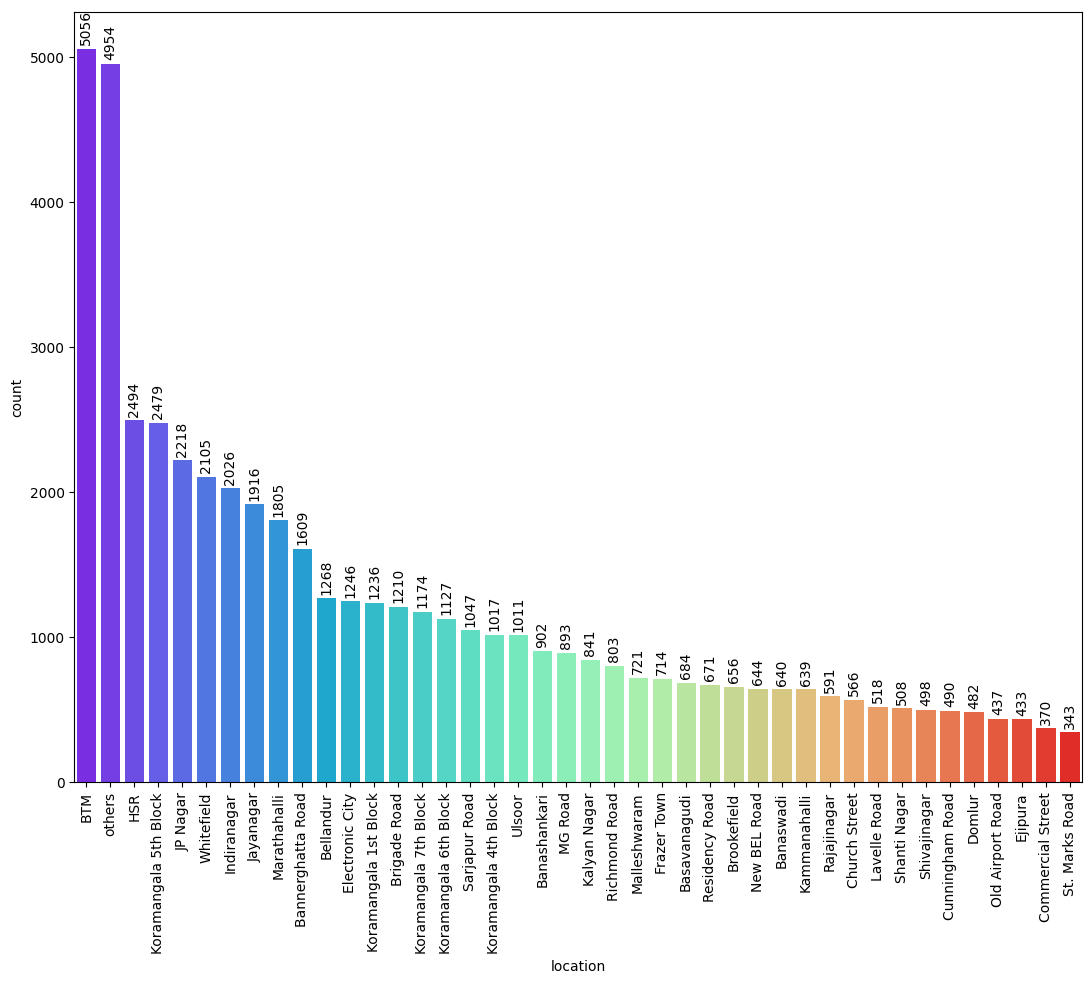

In [154]:
plt.figure(figsize=(13, 10))
ax = sns.countplot(data=zomato_df, x='location', palette='rainbow', order=zomato_df['location'].value_counts().index)
plt.xticks(rotation=90)

for i in ax.containers:
    ax.bar_label(i, padding = 3, rotation = 90)
    
plt.show()

##### From the above graph, We can see that, BTM have higher count of restaurants, opening more new outlets will not lead to high revenue.
##### Instead, In order to open/register new restaurents HSR, Kormangala, JP Nagar and such locations have higher potentials to grow more sales

### Visualizing Online V/S Takeaway orders

C:\Users\devsa\AppData\Local\Temp\ipykernel_3004\3034340583.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=zomato_df, x='online_order', palette='dark')


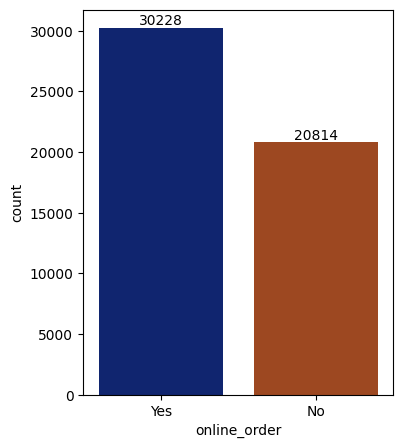

In [157]:
plt.figure(figsize=(4,5))
ax = sns.countplot(data=zomato_df, x='online_order', palette='dark')

for i in ax.containers:
    ax.bar_label(i)

plt.show()

##### From the above graph, We can see that, Most of the restaurents have online orders facility and few of the restaurents have not.

### Visualizing Book table

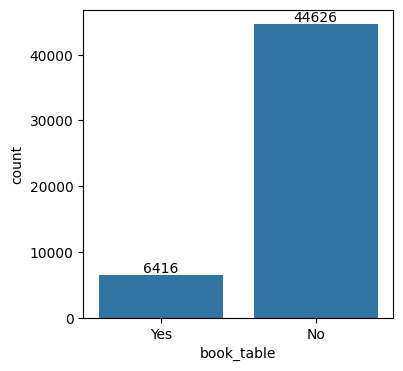

In [159]:
plt.figure(figsize=(4,4))
ax = sns.countplot(data=zomato_df, x='book_table')

for i in ax.containers:
    ax.bar_label(i)

plt.show()

##### From the above graph, We can see that, Most of the restaurents does not provide dineIn/book_table facility and few of the restaurents have book_table facility.

### Visualizing Online order V/S rate

<Axes: xlabel='online_order', ylabel='rate'>

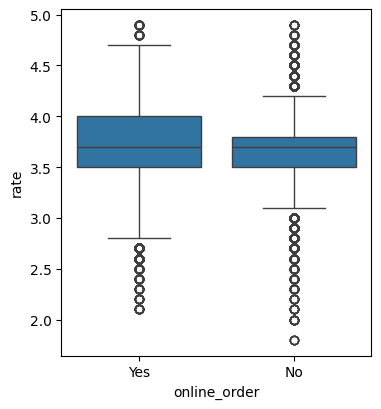

In [131]:
# rate represents the rating of the restaurants, which the consumers rate.

plt.figure(figsize=(4,4.5))
sns.boxplot(data=zomato_df, x='online_order', y='rate')

##### The middle line inside the box defines the median. Starting and ending defines lower and upper Quartile.

##### Those restaurants do online_orders have median rating of around(3.7), majority minimum(3.5) and majority maximum(4.0) rating
##### Those restaurants that don't do online_orders have the same median rating as those that do online_orders. majority minimum(3.5) and majority maximum(3.75) rating.

### Visualizing book_table V/S rate

<Axes: xlabel='book_table', ylabel='rate'>

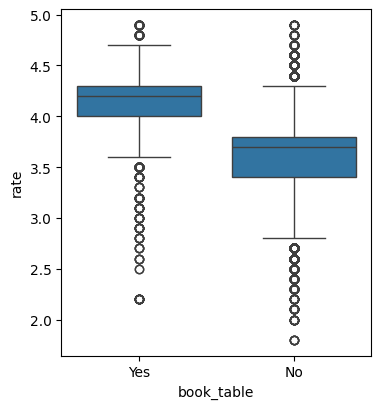

In [132]:
# rate represents the rating of the restaurants, which the consumers rate.

plt.figure(figsize=(4,4.5))
sns.boxplot(data=zomato_df, x='book_table', y='rate')

##### From the above graph, 

##### We get to know Restaurants that have dine_in facilities have higher median ratings than those restaurants that don't have dine_in facilities.
##### Those restaurants do dine_in have median rating of around(4.2), majority minimum(4.0) and majority maximum(4.3) rating.
##### Those restaurants that don't do dine_in have the median rating(3.7), majority minimum(3.3) and majority maximum(3.8) rating.

### Visualizing Online Order Facility, Location Wise

In [133]:
df1 = zomato_df.groupby(['location', 'online_order']).agg({'name':'count'})
df1.to_csv('location_onlineOrders.csv')
df1 = pd.read_csv('location_onlineOrders.csv')
df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)
df1

C:\Users\devsa\AppData\Local\Temp\ipykernel_3004\3732333757.py:4: FutureWarning: The provided callable <function sum at 0x000001B8684EDF80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)


name      
online_order             No   Yes
location                         
BTM                    1763  3293
Banashankari            397   505
Banaswadi               302   338
Bannerghatta Road       685   924
Basavanagudi            243   441
Bellandur               517   751
Brigade Road            552   658
Brookefield             239   417
Church Street           226   340
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  247   235
Ejipura                 214   219
Electronic City         676   570
Frazer Town             287   427
HSR                     584  1910
Indiranagar             697  1329
JP Nagar                911  1307
Jayanagar               552  1364
Kalyan Nagar            350   491
Kammanahalli            264   375
Koramangala 1st Block   384   852
Koramangala 4th Block   459   558
Koramangala 5th Block   866  1613
Koramangala 6th Block   445   682
Koramangala 7th Block   389   785
Lavelle Road            315   203
MG Road                 520   373
Malleshwaram            309   412
Marathahalli            701  1104
New BEL Road            255   389
Old Airport Road        221   216
Rajajinagar             286   305
Residency Road          424   247
Richmond Road           557   246
Sarjapur Road           323   724
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          176   167
Ulsoor                  389   622
Whitefield              986  1119
others                 2064  2890

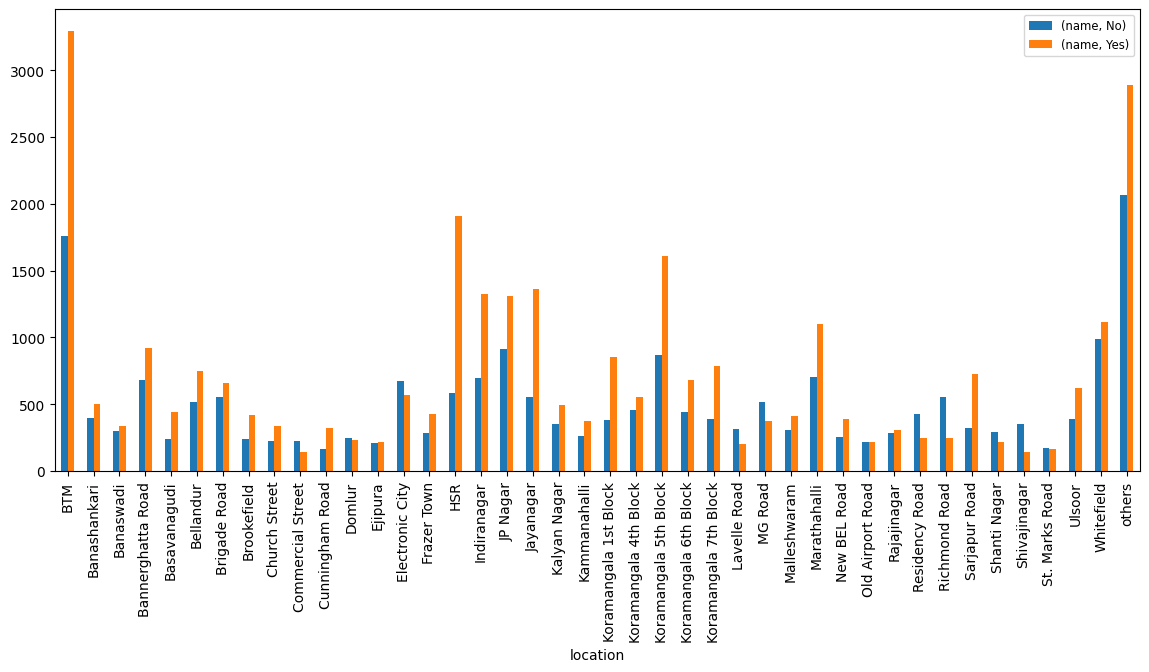

In [134]:
df1.plot(kind='bar', figsize=(14,6))
plt.xticks(rotation=90)
plt.legend(fontsize='small')
plt.show()

##### From the above graph, We can see that in 'BTM' there are many restaurants that provides the online_order and high takeaway facility too.
##### To open new restaurants that will provide an online_facility, We can choose such locations as: Electronic City, Lavelle Road, Sarjapur Road, Shivajinagar, Richmond Road, etc.

### Visualizing Book Table Facility, Location Wise

In [135]:
df2 = zomato_df.groupby(['location', 'book_table']).agg({'name':'count'})
df2.to_csv('location_bookTable.csv')
df2 = pd.read_csv('location_bookTable.csv')
df2 = pd.pivot_table(df2, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)
df2

C:\Users\devsa\AppData\Local\Temp\ipykernel_3004\1387617119.py:4: FutureWarning: The provided callable <function sum at 0x000001B8684EDF80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df2 = pd.pivot_table(df2, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)


name     
book_table               No  Yes
location                        
BTM                    4889  167
Banashankari            839   63
Banaswadi               632    8
Bannerghatta Road      1510   99
Basavanagudi            668   16
Bellandur              1170   98
Brigade Road           1034  176
Brookefield             582   74
Church Street           385  181
Commercial Street       370    0
Cunningham Road         315  175
Domlur                  427   55
Ejipura                 433    0
Electronic City        1148   98
Frazer Town             706    8
HSR                    2277  217
Indiranagar            1578  448
JP Nagar               1903  315
Jayanagar              1637  279
Kalyan Nagar            692  149
Kammanahalli            590   49
Koramangala 1st Block  1186   50
Koramangala 4th Block   695  322
Koramangala 5th Block  1787  692
Koramangala 6th Block  1015  112
Koramangala 7th Block  1012  162
Lavelle Road            290  228
MG Road                 546  347
Malleshwaram            632   89
Marathahalli           1642  163
New BEL Road            588   56
Old Airport Road        378   59
Rajajinagar             550   41
Residency Road          522  149
Richmond Road           687  116
Sarjapur Road           893  154
Shanti Nagar            451   57
Shivajinagar            475   23
St. Marks Road          219  124
Ulsoor                  834  177
Whitefield             1852  253
others                 4587  367

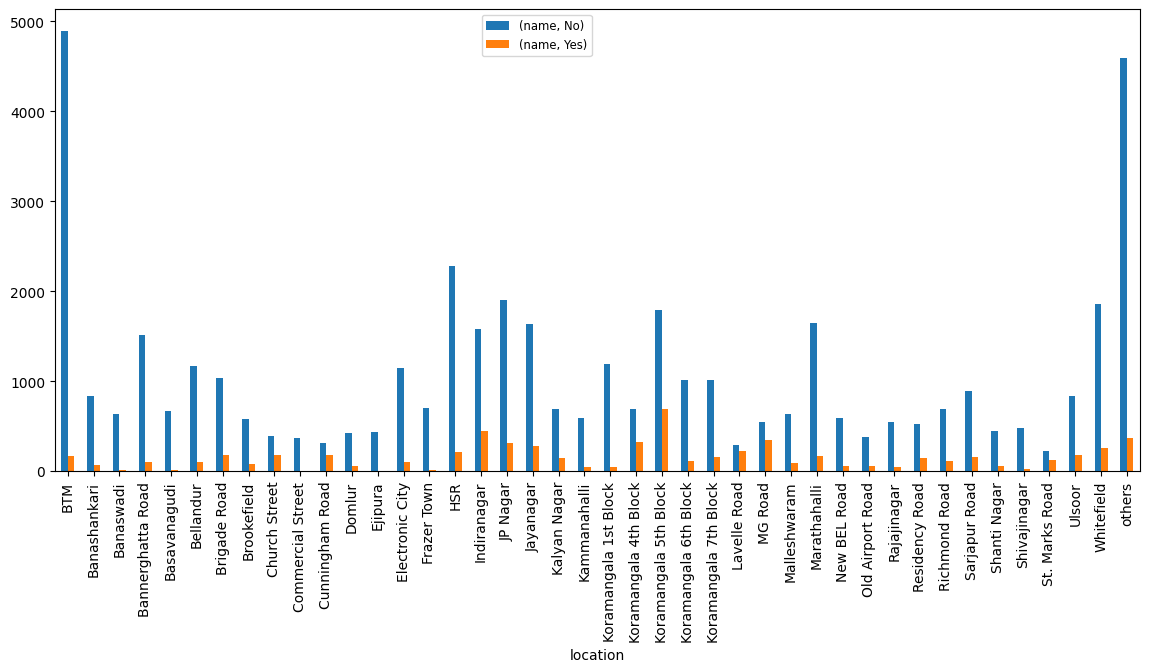

In [136]:
df2.plot(kind='bar', figsize=(14,6))
plt.xticks(rotation=90)
plt.legend(fontsize='small', bbox_to_anchor=(.5,1))
plt.show()

##### From the above graph, We can see that in 'BTM' there are many restaurants. So, It may be not beneficial to open new restaurants.
##### To open new restaurants that will provide a book_table facility, We can choose such locations as Frazer Town, HSR, Electronic City, Marathahalli, etc.

### Visualizing Types of Restaurents vs Rate

C:\Users\devsa\AppData\Local\Temp\ipykernel_3004\55869725.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=zomato_df, x='type', y='rate', palette='viridis')


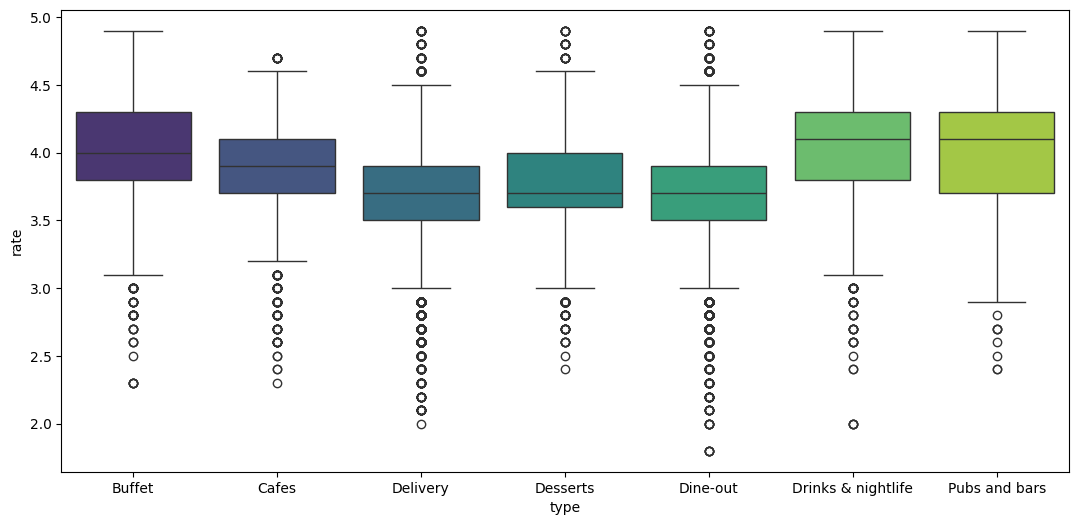

In [137]:
plt.figure(figsize=(13,6))
sns.boxplot(data=zomato_df, x='type', y='rate', palette='viridis')
plt.show()

##### From the above graph, We can see that types of restaurents such as: (Drinks&nightlife), (Pubs&bars) & (Buffet) have highest ratings.
##### Viceversa, restaurents such as: (Delivery), (Dine-out) &  have lowest ratings.
##### If we want to open new restaurents, (Drinks&nightlife), (Pubs&bars) & have higher ratings we should open it in these rest_types.

### Grouping Types of Restaurents, location wise

In [164]:
df3 = zomato_df.groupby(['location', 'type']).agg({'name':'count'})
df3.to_csv('location_type.csv')
df3 = pd.read_csv('location_type.csv')
df3 = pd.pivot_table(df3, values=None, index=['location'], columns=['type'], fill_value=0, aggfunc=np.sum)
df3

C:\Users\devsa\AppData\Local\Temp\ipykernel_3004\1508058218.py:4: FutureWarning: The provided callable <function sum at 0x000001B8684EDF80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 = pd.pivot_table(df3, values=None, index=['location'], columns=['type'], fill_value=0, aggfunc=np.sum)


name                                   \
type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       21    83     3053      198     1660   
Banashankari               7    36      418       71      356   
Banaswadi                  0    24      310       37      262   
Bannerghatta Road          9    46      828      137      578   
Basavanagudi               7    11      344       66      251   
Bellandur                 28    36      617       75      479   
Brigade Road              25    46      497      108      455   
Brookefield                6    17      339       45      245   
Church Street             19    51      193       29      215   
Commercial Street          0    13      121       77      159   
Cunningham Road           29    34      194       26      184   
Domlur                    15    13      261       35      135   
Ejipura                    0     0      245       16      172   
Electronic City           23    24      570       71      516   
Frazer Town                1    11      470       56      172   
HSR                       19    49     1694      120      580   
Indiranagar               38    97     1091      140      529   
JP Nagar                  45    76     1151      166      722   
Jayanagar                 27    77     1043      182      575   
Kalyan Nagar               9    45      366       88      315   
Kammanahalli               2    27      329       35      240   
Koramangala 1st Block      3    26      716       70      398   
Koramangala 4th Block     21    53      464       81      302   
Koramangala 5th Block     65   146     1075      209      842   
Koramangala 6th Block     18    43      511       70      411   
Koramangala 7th Block     25    52      503      127      417   
Lavelle Road              30    27      127       50      191   
MG Road                   51    76      266       68      343   
Malleshwaram              11    31      269       85      291   
Marathahalli              34    32      980      105      630   
New BEL Road               4    29      338       33      224   
Old Airport Road          12     5      200       35      164   
Rajajinagar               10     4      258       55      251   
Residency Road            20    31      187       63      289   
Richmond Road             63    21      257       78      356   
Sarjapur Road             25    22      558       82      319   
Shanti Nagar               9    22      198       39      229   
Shivajinagar               6    17      143       37      280   
St. Marks Road             5    10      111       10      145   
Ulsoor                    16    56      456       71      359   
Whitefield                28    51     1041      137      768   
others                    83   133     2787      276     1553   

                                                        
type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   22            19  
Banashankari                          14             0  
Banaswadi                              6             1  
Bannerghatta Road                      9             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Brigade Road                          57            22  
Brookefield                            4             0  
Church Street                         36            23  
Commercial Street                      0             0  
Cunningham Road                       16             7  
Domlur                                12            11  
Ejipura                                0             0  
Electronic City                       21            21  
Frazer Town                            2             2  
HSR                                   14            18  
Indiranagar    

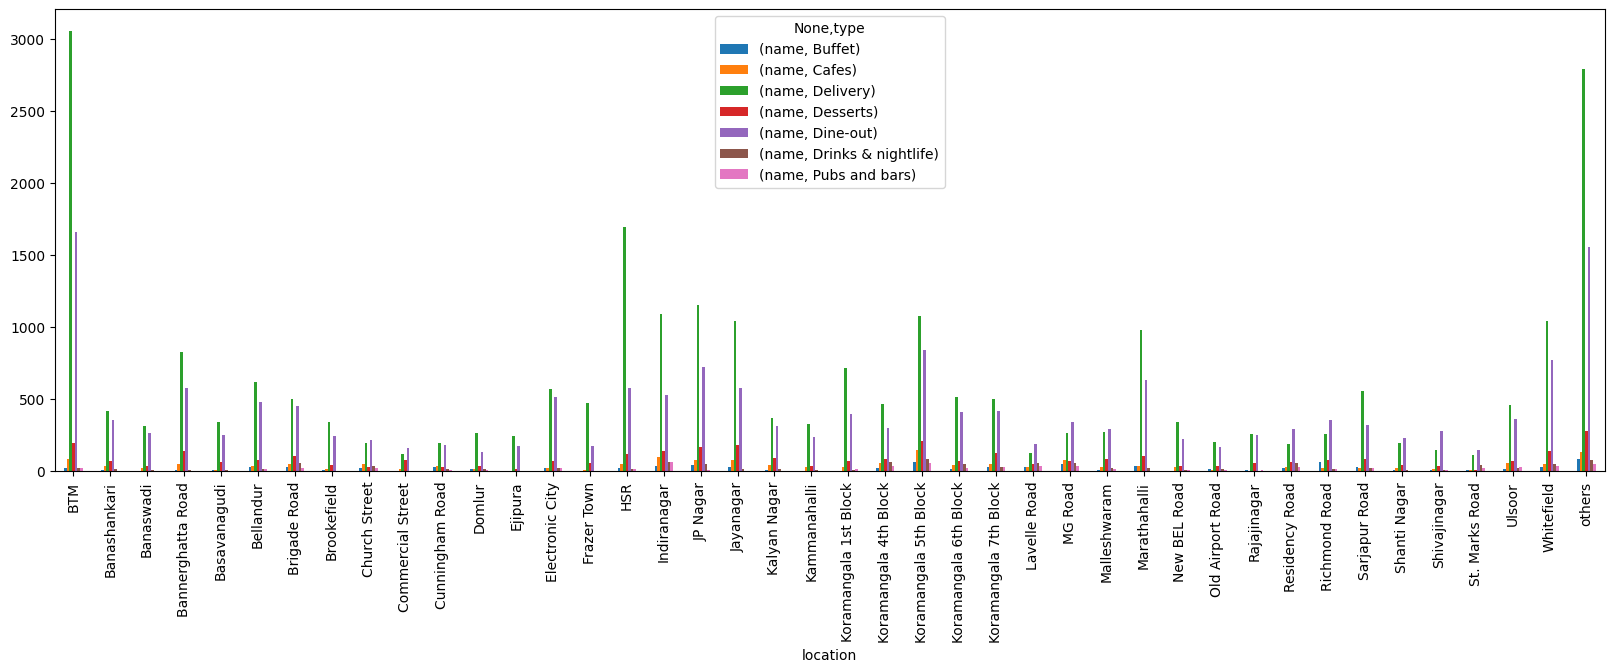

In [163]:
df3.plot(kind='bar', figsize=(20, 6))
plt.show()

##### From the above graph we can see that,
##### There are a large amount of Buffet type restaurants in such locations as BTM, HSR, JP Nagar, Koramangala 5th Block, Whitefield, etc.
##### Similarly, There are good amount of restaurants that cater Dine-out options at such locations as BTM, Kormangala 5th Blk, JP Nagar, Electronic City, etc.

##### Vice versa If we want to open specific types of restaurants for that we need to see the graph for restaurant frequency in particular areas. Such as: Banashankari, Banaswadi, Church Street, Commercial Street, Domlur, etc. 

### No. of Votes, Location Wise

In [140]:
# To gather information on how many people do vote from a particular location.

df4 = zomato_df[['location', 'votes']]
df4.drop_duplicates()
df5 = df4.groupby(['location']).agg({'votes':'sum'})
df5 = df5.sort_values('votes', ascending=False)
df5

,votes
location,
Koramangala 5th Block,2214083
Indiranagar,1165909
Koramangala 4th Block,685156
Church Street,590306
JP Nagar,586522
BTM,573668
others,563807
HSR,498322
Lavelle Road,495777


C:\Users\devsa\AppData\Local\Temp\ipykernel_3004\130078973.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df5, x=df5.index, y='votes', palette='dark')


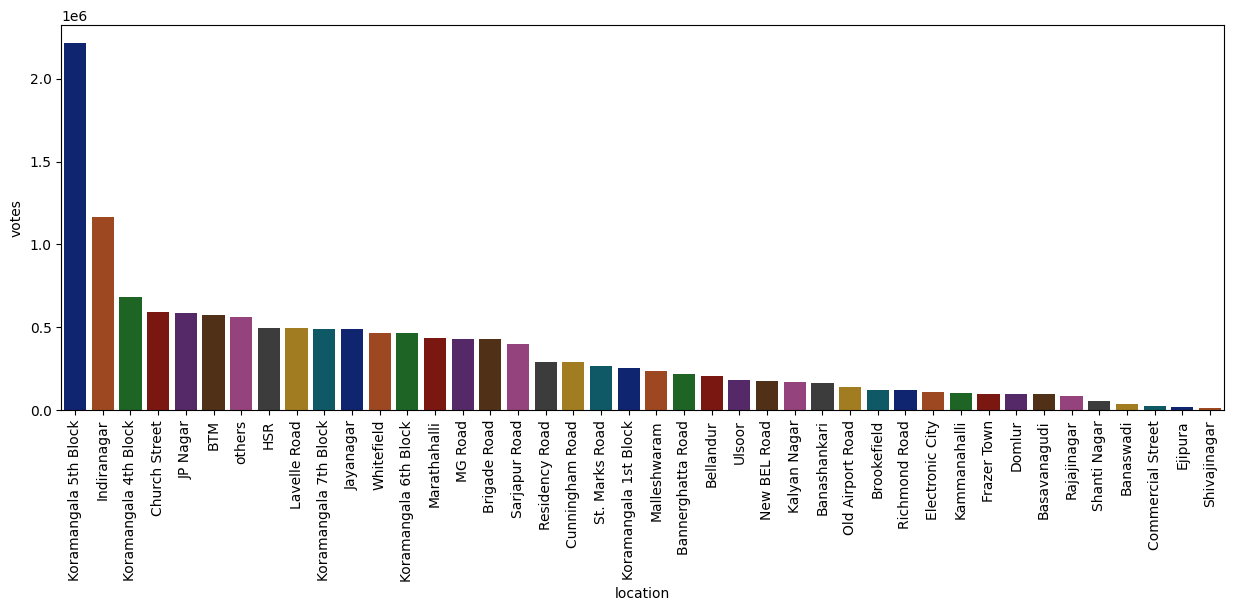

In [141]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df5, x=df5.index, y='votes', palette='dark')
plt.xticks(rotation=90)
plt.show()

##### Max peoples of Koramangla 5th Block do restaurants votes and at 2nd index Indiranagar people do voting.
##### Peoples from Shivajinagar do the least restaurants voting.

### Visualizing Top Voted Cuisines

In [142]:
df6 = zomato_df[['cuisines', 'votes']]
df6.drop_duplicates()
df7 = df6.groupby(['cuisines']).agg({'votes':'sum'})
df7 = df7.sort_values('votes', ascending=False)
df7

,votes
cuisines,
others,11542182
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706
...,...
"Biryani, South Indian",6473
"Kerala, South Indian",6083
"Fast Food, Beverages",5968


In [143]:
# Need to skip the other row from the df7.

# iloc_function -> iloc[row_idx, column_idx]
df7 = df7.iloc[1:, :]
df7

,votes
cuisines,
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706
Chinese,101728
...,...
"Biryani, South Indian",6473
"Kerala, South Indian",6083
"Fast Food, Beverages",5968


C:\Users\devsa\AppData\Local\Temp\ipykernel_3004\710410054.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df7, x=df7.index, y='votes', palette='viridis')


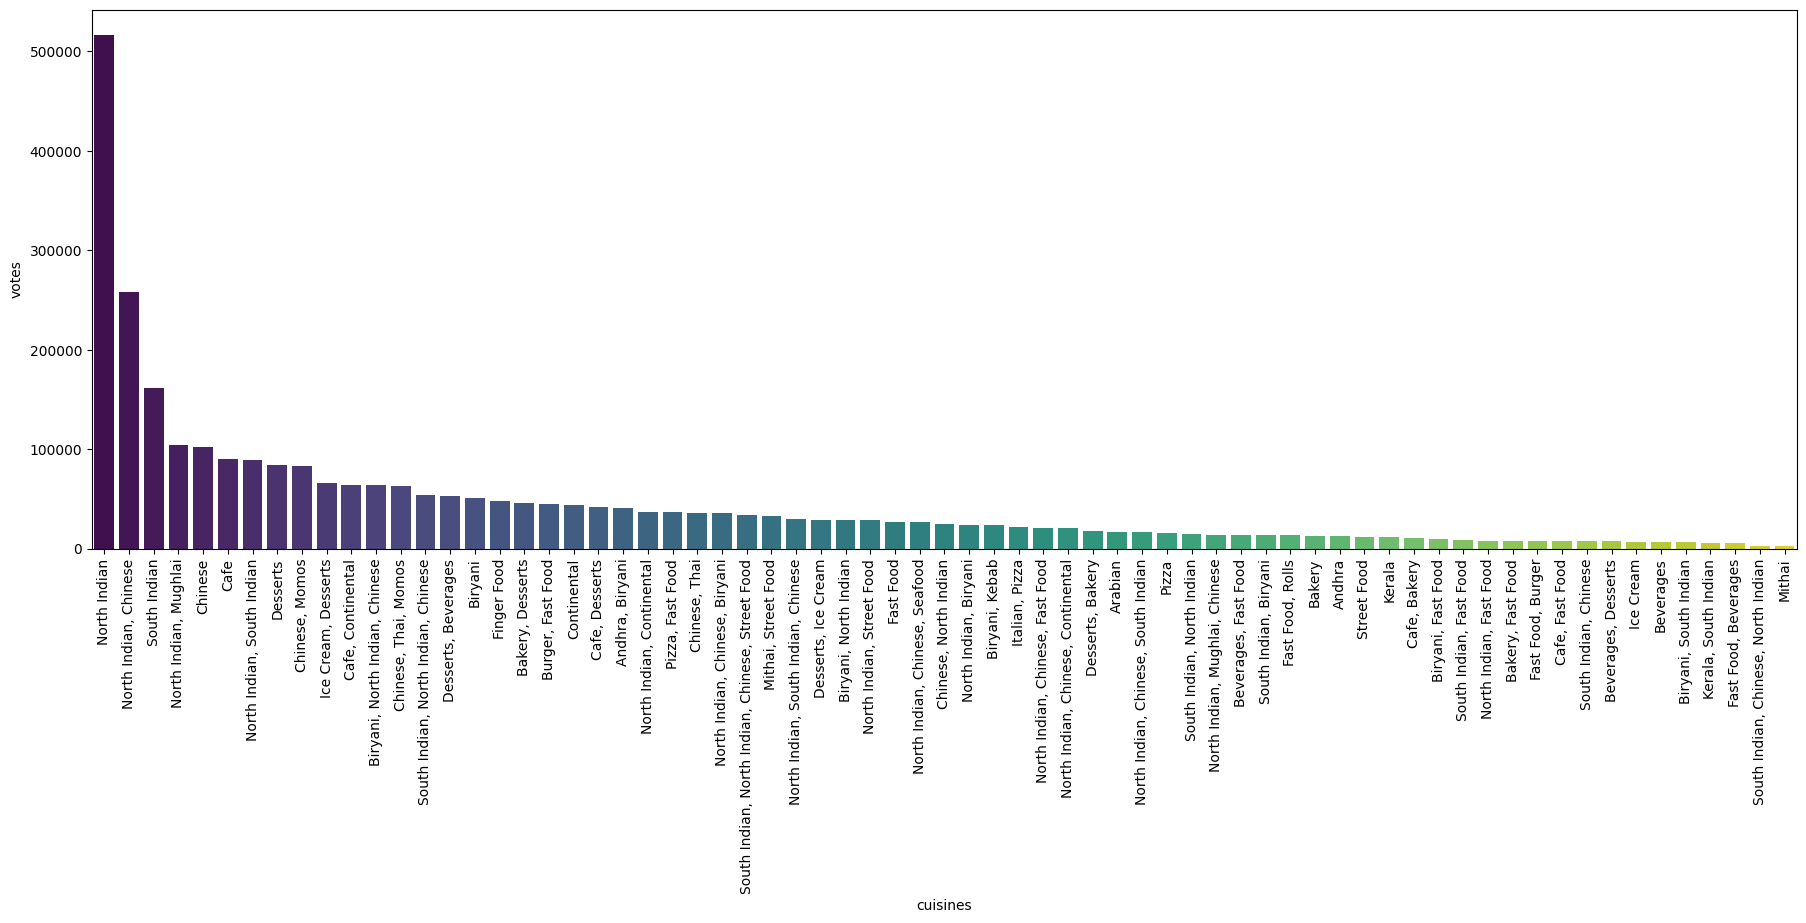

In [144]:
plt.figure(figsize=(22,7))
sns.barplot(data=df7, x=df7.index, y='votes', palette='viridis')
plt.xticks(rotation=90)
plt.show()

##### In banglore, most of the peoples voted for (North Indian, Mughlai), (Chinese), (Cafe) and such cuisines.

# Conclusion:

This analysis of Zomato restaurants in Bangalore provides valuable insights for opening new restaurants in areas with high revenue potential. Here's a summary of the key findings:

1. Location-wise Analysis:
   - BTM has a saturated market with a high number of restaurants. Opening new restaurants there may not significantly contribute to higher revenue.
   - Areas like HSR, Koramangala, JP Nagar show potential for higher revenue due to lower restaurant counts.

2. Online vs. Takeaway Analysis:
   - Online orders constitute 60% of total orders, indicating a strong preference for online dining experiences.

3. Book Table Facilities:
   - Only 13% of restaurants offer table booking facilities, suggesting an opportunity for differentiation in the market.

4. Online Orders vs. Ratings:
   - Restaurants with online ordering facilities tend to have median ratings around 3.7, indicating a positive correlation between online presence and customer satisfaction.

5. Book Table Facilities vs. Ratings:
   - Restaurants offering dine-in facilities tend to have higher median ratings (around 4.2) compared to those without (median rating of 3.7), emphasizing the importance of dine-in experiences.

6. Online Order Facility, Location-wise:
   - Locations like Electronic City, Lavelle Road, Sarjapur Road show potential for new restaurants with online ordering facilities.

7. Book Table Facility, Location-wise:
   - Areas like Frazer Town, HSR, and Electronic City offer opportunities for new restaurants with table booking facilities.

8. Types of Restaurants vs. Ratings:
   - Restaurants categorized as (Drinks & Nightlife), (Pubs & Bars), and (Buffet) tend to have higher ratings, suggesting potential success in these categories.

9. Types of Restaurants, Location-wise:
   - Buffet restaurants are popular in areas like BTM, HSR, JP Nagar, indicating potential demand in these locations. Similar analysis can guide decisions for other restaurant types.

10. Number of Votes, Location-wise:
    - Areas like Koramangala 5th Block and Indiranagar have high participation in restaurant voting, indicating active engagement from residents.

11. Top Voted Cuisines:
    - North Indian, Mughlai, Chinese, and Cafe cuisines are popular among Banglore residents, suggesting opportunities for new restaurants focusing on these cuisines.


Incorporating these insights into decision-making can help in strategically opening new restaurants in areas with lower restaurant counts, thereby maximizing revenue potential and catering to the preferences of Banglore residents.